<a href="https://colab.research.google.com/github/BrunoReis136/tensorflow/blob/main/TensorFlowTTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
!tar xvjf LJSpeech-1.1.tar.bz2
#download LJSpeech-1.1  dataset de TTS

In [ ]:
!pip install tensorflow tensorflow-hub

<h2>TTS MODEL</h2>



it is of the first importance that the letter used should be fine in form;


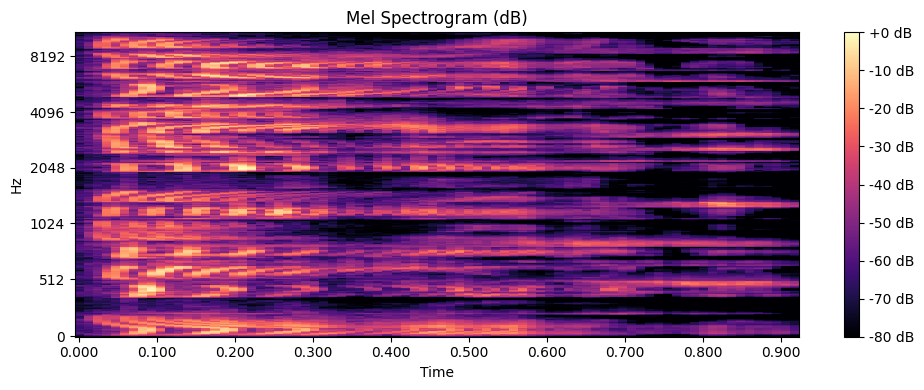

In [7]:
import tensorflow as tf
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
from tensorflow.keras import models, layers

metadata = pd.read_csv('LJSpeech-1.1/metadata.csv', sep="|", header=None)
metadata.columns = ['file_id', 'text', 'normalized_text']

def load_mel(file_path):
  y, sr = librosa.load(file_path, sr=22050)
  mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=256, n_mels=80)
  mel_db = librosa.power_to_db(mel, ref=np.max)
  return mel_db

mel_db = load_mel(audio_path)

'''

# AudioDisplay and Plot the Mel spectrogram
n = 10
file_name = metadata.iloc[n]['file_id']
print(metadata.iloc[n]['text'])

audio_path = f'LJSpeech-1.1/wavs/{file_name}.wav'

display(Audio(filename=audio_path))

plt.figure(figsize=(10, 4))

librosa.display.specshow(mel_db.T, sr=22050, hop_length=256, x_axis='time', y_axis='mel')

plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (dB)')
plt.tight_layout()
plt.show()

'''

embedding_dim = 256
encoder_units = 512
decoder_units = 1024
mel_dim = 80

def build_tts_encoder_decorer(vocab_size):
    #Entrada, embedding
    text_input = layers.Input(shape=(None,), dtype='int32', name='text_input')
    embed = layers.Embedding(input_dim = vocab_size, output_dim=embedding_dim)(text_input)

    #Encoder bidirecional com memória reforçada(LSTM)
    encoder_outputs = layers.Bidirectional(layers.LSTM(encoder_units, return_sequences=True))(embed)

    #Attention(reforço do encoder em si mesmo)
    attention = layers.Attention()([encoder_outputs, encoder_outputs])

    #Decoder para gerar spectrogramas memória reforçada (LSTM)
    decorer_lstm = layers.LSTM(decoder_units, return_sequences=True)(attention)
    mel_output = layers.TimeDistributed(layers.Dense(mel_dim))(decoder_lstm)

    #Montagem do modelo final para retornar
    model = models.Model(inputs=text_input, outputs=mel_output)
    return model
